In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fb=pd.read_csv('dataset_Facebook.csv',sep=';')
print(fb.columns)

print(fb.isnull().sum())
columns_with_nan = fb.columns[fb.isna().any()].tolist()
fb2=fb[~fb['Paid'].isnull()]
fb2=fb2[~fb2['like'].isnull()]
fb2=fb2[~fb2['share'].isnull()]


X=pd.concat([fb2.iloc[:,:10],fb2.iloc[:,11:]], axis=1)
y=fb2.iloc[:,10].values

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid    

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X['Type'] = labelencoder_X.fit_transform(X.iloc[:,1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300,random_state=0)
regressor.fit(X,y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Random Forest Model - Training Dataset')

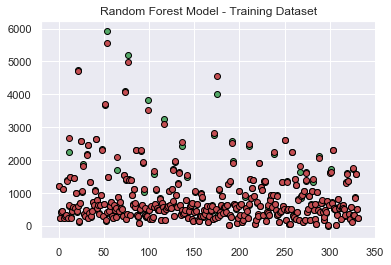

In [5]:
y_pred=regressor.predict(X_train)

plt.figure()
X_grid = np.arange(1, X_train.shape[0]+1, 1)
plt.scatter(X_grid, y_train, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.scatter(X_grid, y_pred, c='r', label='test', zorder=1,
            edgecolors=(0, 0, 0))

plt.title("Random Forest Model - Training Dataset")

Text(0.5, 1.0, 'Random Forest Model - Test Dataset')

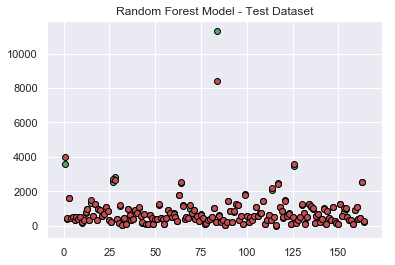

In [6]:
y_pred=regressor.predict(X_test)
plt.figure()
X_grid = np.arange(1, X_test.shape[0]+1, 1)
plt.scatter(X_grid, y_test, c='g', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.scatter(X_grid, y_pred, c='r', label='test', zorder=1,
            edgecolors=(0, 0, 0))

plt.title("Random Forest Model - Test Dataset")

Text(0.5, 1.0, 'Decision Tree Regressor Model- Actual vs Predict')

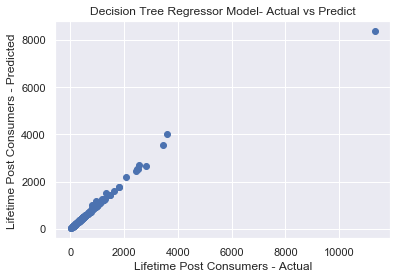

In [7]:
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel("Lifetime Post Consumers - Actual")
plt.ylabel("Lifetime Post Consumers - Predicted ")
plt.title("Decision Tree Regressor Model- Actual vs Predict")

In [8]:
print("Model score , training dataset: %f" %( regressor.score(X_train,y_train)))
print("Model score , test dataset: %f" %( regressor.score(X_test,y_test)))

Model score , training dataset: 0.994903
Model score , test dataset: 0.947814
